#              Predicting the best delivery area for Small Entrepreneurs

## Section 1. Introduccion

At this time in Lima, many people are reinventing their businesses due to the new quarantine and the best way is by offering products through social networks with delivery. My cousin wants to invest her savings in offering desserts for clients close to her home or where she can ride a bicycle to deliver the product. Therefore, I will help you identify possible areas where you can offer your products.

If it is optimal, it could be used to recommend any type of business that wants to offer similar products

## 1.1 Objectives

- not generate high costs or waste a lot of time in delivery
- describe businesses with similar services

## 1.2 Priorities

- Describe the community, to give an idea of the type of businesses in your location
- Describe the competition, to quantify the businesses that target your same customers


## Section 2: Data

Based on the objectives and priorities of the case, the data section is defined:

## 2.1 Analytic aprroach

For this development we will be based on a descriptive model. Using clustering or segmentation techniques.

## 2.2 Data Sources

- I use geocoders: get Data of actual location coordinates
- I use Foursquare API Calls: get Data of location of nearby businesses.
- I use GITHUB like repository of my notebook.

## Section 3: Methodology

### Identify the coordinates of 3 areas interested by the client:
I will use geocode to obtain the origin location.

In [2]:
#Librerias
import pandas as pd
! pip install folium==0.5.0
import folium # plotting library
!pip install geopy
from geopy.geocoders import Nominatim
print ('Doing')

     |████████████████████████████████| 79 kB 5.3 MB/s eta 0:00:011
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=3d606742a036da7b6379c04acf5c971190eabf8b5343c5ec6ed281b5f9ab11fc
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Doing


In [3]:
grupo = 'target 1'
address = 'Av. canadá 1110,Lima, Perú'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
grupo2 = 'target 2'
address2 = 'Av. Guardia Civil 421,Lima, Perú'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address2)
latitude2 = location.latitude
longitude2 = location.longitude
grupo3 = 'target 3'
address3 = 'Carlos Villarán 140,Lima, Perú'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address3)
latitude3 = location.latitude
longitude3 = location.longitude

In [4]:
import pandas as pd
target = {'Adrees': [grupo,grupo2,grupo3],'Latitud': [latitude,latitude2,latitude3],'Longitude': [longitude,longitude2,longitude3]}
target_frame = pd.DataFrame(target)
target_frame

,Adrees,Latitud,Longitude
0,target 1,-12.082902,-77.015544
1,target 2,-12.092549,-77.008657
2,target 3,-12.089172,-77.023246


In [6]:
#graficamos ubicacion de los target respecto a la ubicacion real
address = 'Av. Nicolás Arriola 480, Lima, Perú'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

target_map = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map
for lat, lng, neighborhood in zip(target_frame['Latitud'], target_frame['Longitude'], target_frame['Adrees']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker( [lat, lng],radius=5,popup=label,color='blue',
        fill=True,fill_color='#3186cc',fill_opacity=0.7,
        parse_html=False).add_to(target_map)  
    
marcador1 = folium.Marker(location=(latitude,longitude),icon=folium.Icon(color="black"))
marcador1.add_to(target_map)
# display map
target_map

### Using Fourquare to get nearvy bussiness and categories. 
We decided to use a radius of 1500 meters, because in most cases they will use bicycles. And they are used to traveling 2km as a sports activity.

In [7]:
#Create variables for access to Foursquare
import requests 
CLIENT_ID = 'LYQS0RPQHSSLCADD3411DNEF00KIT4D3GBER4GLP0Q1XDJQC' 
CLIENT_SECRET = 'KFIMJG100141HTEP1C2VHQESLIAPJXYD4AZ5RGDZO5GLEDX2' 
VERSION = '20180605' 
LIMIT = 100 

#Create Function to get nearby business 
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)   
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, 
            v['venue']['name'], v['venue']['location']['lat'],  v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 'Venue Latitude',  'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [8]:
targets_venues = getNearbyVenues(names=target_frame['Adrees'],
                                   latitudes=target_frame['Latitud'],
                                   longitudes=target_frame['Longitude'])
targets_venues.head()

target 1
target 2
target 3


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,target 1,-12.082902,-77.015544,BARRA KHUDA - Resto Mar,-12.084119,-77.020552,Restaurant
1,target 1,-12.082902,-77.015544,La Rocca Café,-12.085527,-77.015342,Café
2,target 1,-12.082902,-77.015544,Tomyko Spa,-12.088118,-77.020764,Spa
3,target 1,-12.082902,-77.015544,Chifa Titi,-12.089957,-77.015903,Chinese Restaurant
4,target 1,-12.082902,-77.015544,Catalina 555,-12.086243,-77.018810,Peruvian Restaurant


### Describing the data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df_test = targets_venues[['Venue Category','Venue']]
df_grpC = df_test['Venue Category'].value_counts().to_frame()
df_grpC.rename (columns = {'Venue Category':'value_counts'}, inplace = True)
df_grpC['value_counts'].describe()

count    70.000000
mean      4.285714
std       5.798908
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      27.000000
Name: value_counts, dtype: float64

Text(0.5, 1.0, 'Top of categories in data')

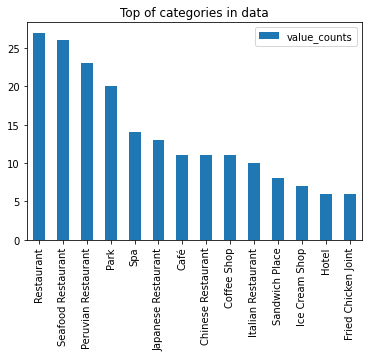

In [17]:
# 75% of the sample has less than 4 businesses per category, so we will review the categories that have more than 5 businesses
g2=df_grpC.loc[df_grpC['value_counts']> 5]
g2.plot(kind = 'bar')
plt.title ('Top of categories in data')

### Top categories services for each target

In [21]:
# Top Categories to each 'Neighborhood'
Target_onehot = pd.get_dummies(targets_venues[['Venue Category']], prefix="", prefix_sep="")
Target_onehot['Neighborhood'] = targets_venues['Neighborhood'] 
fixed_columns = [Target_onehot.columns[-1]] + list(Target_onehot.columns[:-1])
Target_onehot = Target_onehot[fixed_columns]
Target_grouped = Target_onehot.groupby('Neighborhood').mean().reset_index()
Target_grouped.shape

(3, 71)

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
import numpy as np
num_top_venues = 8
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Target_grouped['Neighborhood']

for ind in np.arange(Target_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Target_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,target 1,Restaurant,Seafood Restaurant,Park,Peruvian Restaurant,Spa,Japanese Restaurant,Ice Cream Shop,Sandwich Place
1,target 2,Park,Restaurant,Seafood Restaurant,Chinese Restaurant,Coffee Shop,Peruvian Restaurant,Spa,Ice Cream Shop
2,target 3,Peruvian Restaurant,Seafood Restaurant,Restaurant,Café,Japanese Restaurant,Italian Restaurant,Spa,Hotel


### Grouping similar targets

In [27]:
#Agrupar con kMeans
from sklearn.cluster import KMeans 
kclusters = 2
Target_grouped_clustering = Target_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Target_grouped_clustering)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Toronto_merged = target_frame
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Adrees')
Toronto_merged

,Adrees,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,target 1,-12.082902,-77.015544,0,Restaurant,Seafood Restaurant,Park,Peruvian Restaurant,Spa,Japanese Restaurant,Ice Cream Shop,Sandwich Place
1,target 2,-12.092549,-77.008657,0,Park,Restaurant,Seafood Restaurant,Chinese Restaurant,Coffee Shop,Peruvian Restaurant,Spa,Ice Cream Shop
2,target 3,-12.089172,-77.023246,1,Peruvian Restaurant,Seafood Restaurant,Restaurant,Café,Japanese Restaurant,Italian Restaurant,Spa,Hotel


## Section 4: Results

- Grouping with kmeans, we verify that target 1 y 2 are very similar areas by the presence of parks and restaurants. But looking deeply at target 1 (it is the area closest to its location), it turns out to have less direct competition. Making the area more attractive.

In [33]:
Toronto_merged [Toronto_merged ['Adrees']=='target 1']

,Adrees,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,target 1,-12.082902,-77.015544,0,Restaurant,Seafood Restaurant,Park,Peruvian Restaurant,Spa,Japanese Restaurant,Ice Cream Shop,Sandwich Place


-	Looking closely at target 2 and 3, apart from being more remote áreas. We found a greater presence of ‘Café / Coffee Shop’. Who should be our direct competition. In each target they represent 9% of businesses

In [35]:
Target_grouped[['Neighborhood','Restaurant','Park','Café','Coffee Shop']]

,Neighborhood,Restaurant,Park,Café,Coffee Shop
0,target 1,0.10,0.07,0.02,0.02
1,target 2,0.08,0.10,0.03,0.06
2,target 3,0.09,0.03,0.06,0.03


## Section 5: Discussion

As I mentioned before target 1 y 2 are very similar areas by the presence of parks and restaurants. But if we want to apply the initial objectives, target 1 would be optimal.

Since we would invest less time in deliveries and there would not be much risk to reduce prices.

I don’t specify that the targets 2 and 3, we must not reach. But there is competition, we would have to investigate some of these stores in the area and see if the offer is very similar to what they would sell.
Otherwise, this area could be included as a point of sale.

## Section 6: Conclusion

This model can help as a first idea, for new businessman who want to cover new areas or have an initial view of the areas where they will offer their products.

Nowadays, due to the commercial restrictions caused by covid-19, new businessman don’t start with physical stores. This model would help a lot.

If the incursion in the projected areas works, this study could also help - in the future - when trying to prospect the opening of physical stores according to the area where they have the greatest demand.

Created by: Dina Joselyn Llocya Landa